<a href="https://colab.research.google.com/github/Radhakrishna2055/SMLB-39/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 3

Question 1: MLE Results
latitude - Mean (μ): 35.63186143410853, Std (σ): 2.135900653797483
total_rooms - Mean (μ): 2635.7630813953488, Std (σ): 2181.5624017359723
housing_median_age - Mean (μ): 28.639486434108527, Std (σ): 12.585252725724606
total_bedrooms - Mean (μ): 537.8705525375618, Std (σ): 421.37475856260727

Question 2: Log-Likelihood Results for Latitude
Log-Likelihood for latitude = 50: -24.30388630999708
Log-Likelihood for latitude = 75: -171.5403881924758
Log-Likelihood for latitude = 80: -217.42758836196197


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


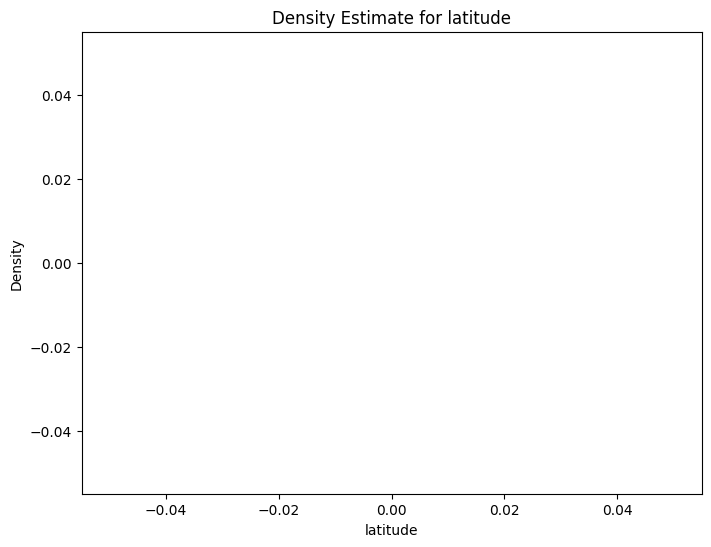

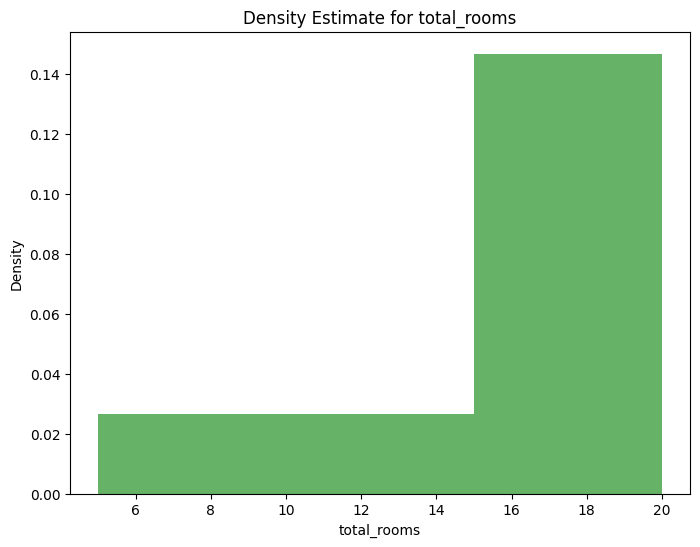

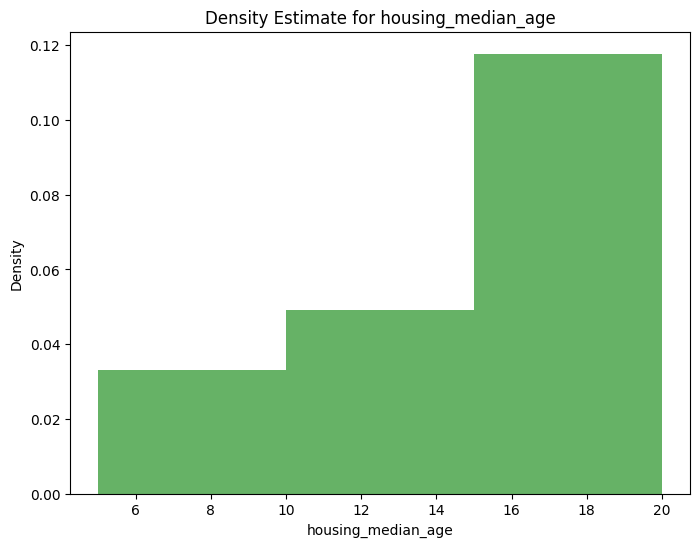

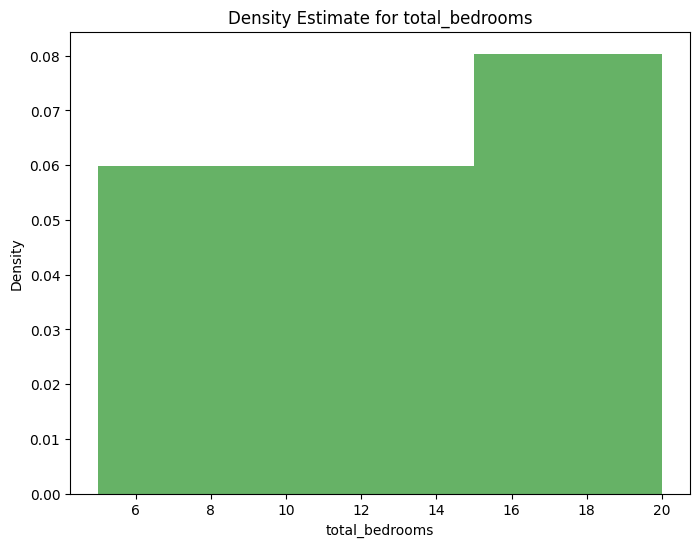


Question 3: Density Observations
latitude - Density: [nan nan nan], Bin edges: [ 5 10 15 20]
total_rooms - Density: [0.02666667 0.02666667 0.14666667], Bin edges: [ 5 10 15 20]
housing_median_age - Density: [0.03312145 0.04918033 0.11769823], Bin edges: [ 5 10 15 20]
total_bedrooms - Density: [0.05981308 0.05981308 0.08037383], Bin edges: [ 5 10 15 20]


In [ ]:
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'housing.csv'
california_housing = pd.read_csv(file_path)

# Columns to analyze
columns_to_analyze = ['latitude', 'total_rooms', 'housing_median_age', 'total_bedrooms']

# Question 1: Calculate the MLE for each specified column
mle_results = {}
for column in columns_to_analyze:
    mu, std = norm.fit(california_housing[column].dropna())
    mle_results[column] = {'Mean (mu)': mu, 'Std (sigma)': std}

# Print the MLE results
print("Question 1: MLE Results")
for column, params in mle_results.items():
    print(f"{column} - Mean (μ): {params['Mean (mu)']}, Std (σ): {params['Std (sigma)']}")

# Question 2: Calculate log-likelihood for latitude at values 50, 75, 80
latitude_mu = mle_results['latitude']['Mean (mu)']
latitude_sigma = mle_results['latitude']['Std (sigma)']
values_to_evaluate = [50, 75, 80]

log_likelihoods = {value: norm.logpdf(value, latitude_mu, latitude_sigma) for value in values_to_evaluate}

# Print the log-likelihood results
print("\nQuestion 2: Log-Likelihood Results for Latitude")
for value, log_likelihood in log_likelihoods.items():
    print(f"Log-Likelihood for latitude = {value}: {log_likelihood}")

# Question 3: Estimate density for each column and bins
bins = [5, 10, 15, 20]
density_estimates = {}

for column in columns_to_analyze:
    density, bin_edges = np.histogram(california_housing[column].dropna(), bins=bins, density=True)
    density_estimates[column] = (density, bin_edges)

    # Plotting the density estimates
    plt.figure(figsize=(8, 6))
    plt.hist(california_housing[column].dropna(), bins=bins, density=True, alpha=0.6, color='g')
    plt.title(f'Density Estimate for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

# Observations based on density estimates
print("\nQuestion 3: Density Observations")
for column, (density, bin_edges) in density_estimates.items():
    print(f"{column} - Density: {density}, Bin edges: {bin_edges}")

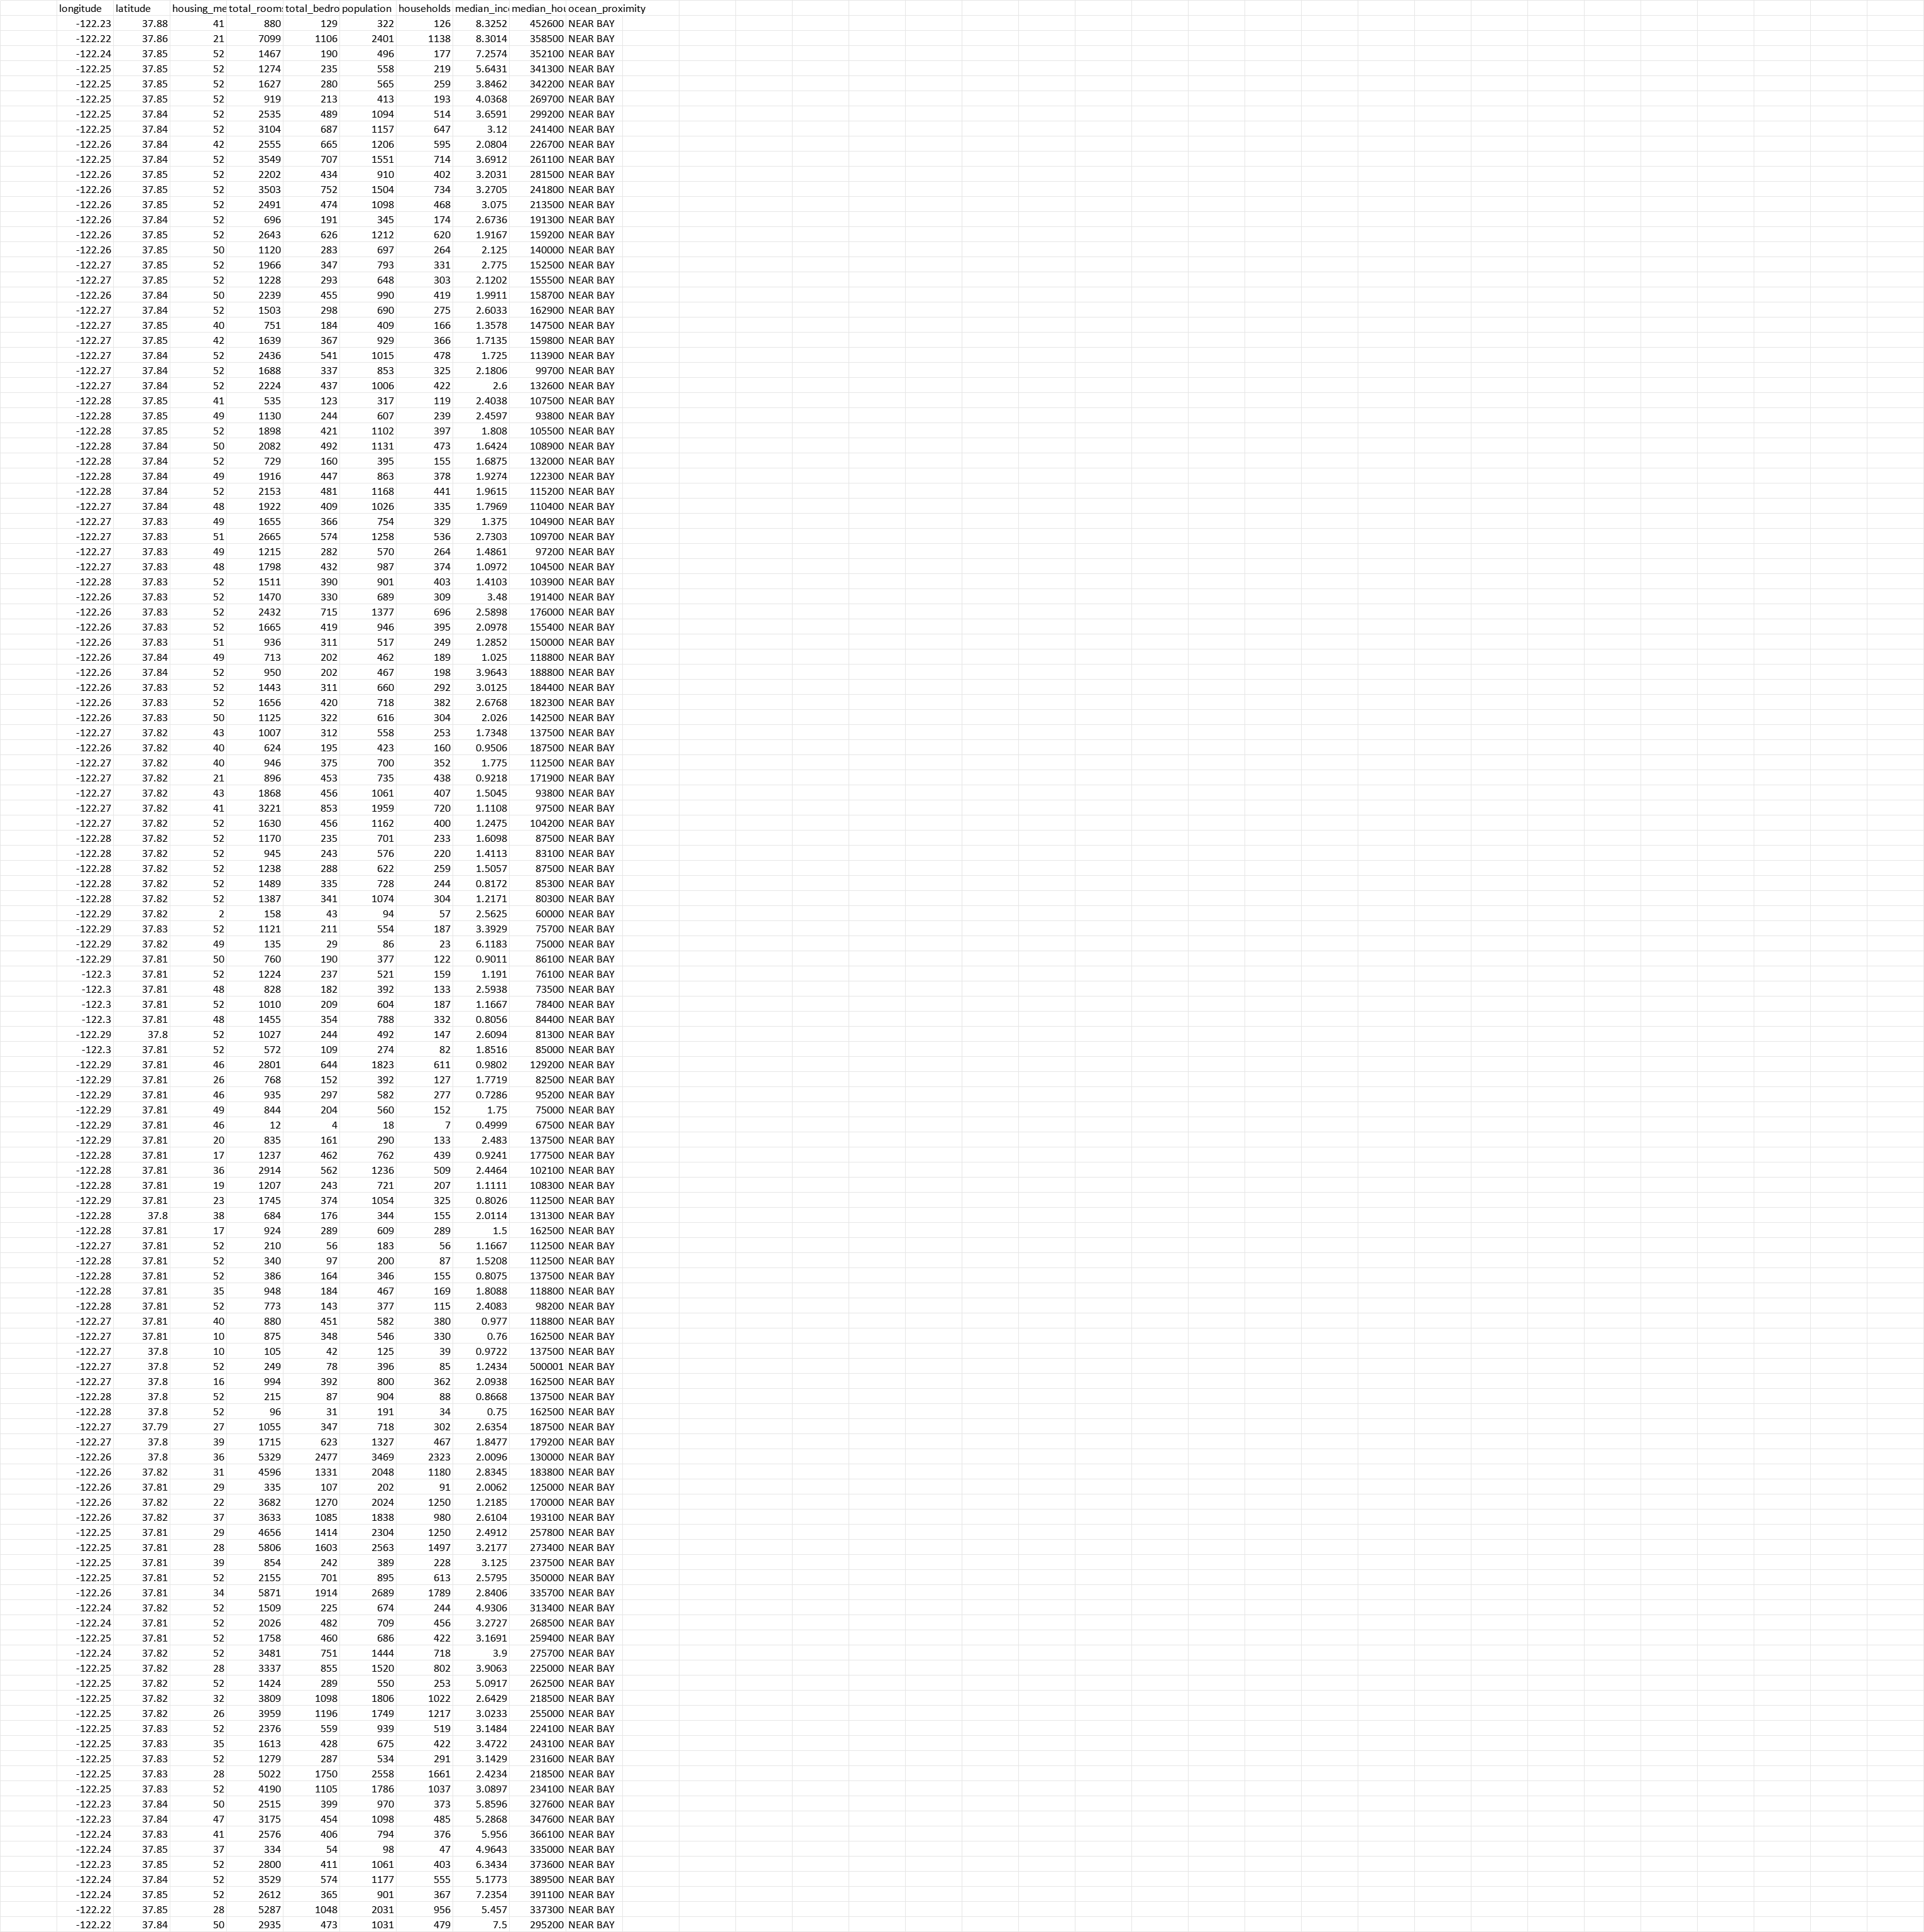